## Downloading the dataset from Google Drive.


https://drive.google.com/file/d/1HfQR301KV02c1FTm3zIAtiodv0-DgLak/view

## Importing Libraries

#### Importing library for YOLO

In [ ]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 27.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 125.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 91.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 67.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 16.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 106.6 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstallin

#### Unzipping the dataset

In [ ]:
import zipfile
import os

# Replace with your path
zip_path = "/content/GroceryDataset.v2-v2.yolov11.zip"
extract_path = "/content"

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print("Dataset unzipped successfully.")

Dataset unzipped successfully.


### Exploratory Data Analyis on Train data

#### Exploring the Directory Structure

In [ ]:
import os

# Show the directory structure
for root, dirs, files in os.walk(extract_path):
    level = root.replace(extract_path, '').count(os.sep)
    indent = ' ' * 4 * level
    print(f"{indent}{os.path.basename(root)}/")
    subindent = ' ' * 4 * (level + 1)
    for f in files[:5]:  # Show only first 5 files for brevity
        print(f"{subindent}{f}")

content/
    GroceryDataset.v2-v2.yolov11.zip
    .config/
        .last_opt_in_prompt.yaml
        config_sentinel
        hidden_gcloud_config_universe_descriptor_data_cache_configs.db
        default_configs.db
        active_config
        logs/
            2025.05.05/
                13.39.44.853016.log
                13.39.44.029914.log
                13.39.00.019572.log
                13.39.21.929371.log
                13.39.32.178377.log
        configurations/
            config_default
    Grocery Dataset.v2-v2.yolov11/
        README.dataset.txt
        README.roboflow.txt
        data.yaml
        train/
            labels/
                IMG_2621_jpg.rf.5d7677b8a114a55b46dd84fb097b89a2.txt
                7ca20835-IMG_2761.txt
                IMG_3137_jpg.rf.b8ba007b5f0dc825d192483efc927e99.txt
                IMG_8726_jpg.rf.9f5531bda725f7ad5a089f24bce59125.txt
                IMG_3092_jpg.rf.1f1f449d9dce35411b94bd51781ca4c8.txt
            images/
                IM

#### Load and Parsing the data.yaml for class names

In [ ]:
import yaml

yaml_path = os.path.join(extract_path, '/content/Grocery Dataset.v2-v2.yolov11/data.yaml')

with open(yaml_path, 'r') as stream:
    data_yaml = yaml.safe_load(stream)

print("Classes:", data_yaml['names'])
num_classes = data_yaml['nc']

Classes: ['Bisconni Chocolate Chip Cookies', 'Coca Cola Can', 'Colgate Maximum Cavity Protection', 'Fanta', 'Fresher Guava Nectar', 'Islamabad Tea', 'Kolson Slanty Jalapeno', 'Kurkure Chutney Chaska', 'LU Candi Biscuit', 'LU Oreo Biscuit', 'LU Prince Biscuit', 'Lays Masala', 'Lays Wavy Mexican Chili', 'Lifebuoy Total Protect Soap', 'Lipton Yellow Label Tea', 'Meezan Ultra Rich Tea', 'Nestle Fruita Vitals Red Grapes', 'Peek Freans Sooper Biscuit', 'Safeguard Bar Soap Pure White', 'Shezan Apple', 'Sunsilk Shampoo Soft & Smooth', 'Super Crisp BBQ', 'Supreme Tea', 'Tapal Danedar', 'Vaseline Healthy White Lotion']


#### Count Images and Annotations

In [ ]:
from glob import glob
import os

# Set base extract path correctly
extract_path = "/content/Grocery Dataset.v2-v2.yolov11"

# Now correctly join relative subdirectories
image_files = glob(os.path.join(extract_path, "train", "images", "*.jpg"))
label_files = glob(os.path.join(extract_path, "train", "labels", "*.txt"))

print(f"Total training images: {len(image_files)}")
print(f"Total training annotations: {len(label_files)}")



Total training images: 7060
Total training annotations: 7060


#### Distribution of classes

In [ ]:
from collections import Counter

label_counts = Counter()

for label_file in label_files:
    with open(label_file, 'r') as f:
        for line in f:
            class_id = int(line.strip().split()[0])
            label_counts[class_id] += 1

# Map class IDs to names
class_distribution = {data_yaml['names'][k]: v for k, v in label_counts.items()}
print("Class distribution:", class_distribution)


Class distribution: {'Lays Masala': 296, 'Lifebuoy Total Protect Soap': 281, 'Vaseline Healthy White Lotion': 257, 'Super Crisp BBQ': 290, 'Fresher Guava Nectar': 408, 'LU Candi Biscuit': 281, 'Safeguard Bar Soap Pure White': 183, 'Tapal Danedar': 289, 'Shezan Apple': 293, 'Meezan Ultra Rich Tea': 282, 'Islamabad Tea': 383, 'Nestle Fruita Vitals Red Grapes': 257, 'Peek Freans Sooper Biscuit': 201, 'Fanta': 282, 'Bisconni Chocolate Chip Cookies': 274, 'LU Oreo Biscuit': 259, 'Lipton Yellow Label Tea': 282, 'Kurkure Chutney Chaska': 301, 'Kolson Slanty Jalapeno': 290, 'Sunsilk Shampoo Soft & Smooth': 226, 'Coca Cola Can': 304, 'LU Prince Biscuit': 273, 'Colgate Maximum Cavity Protection': 283, 'Lays Wavy Mexican Chili': 302, 'Supreme Tea': 286}


#### Plot of Class Distribution

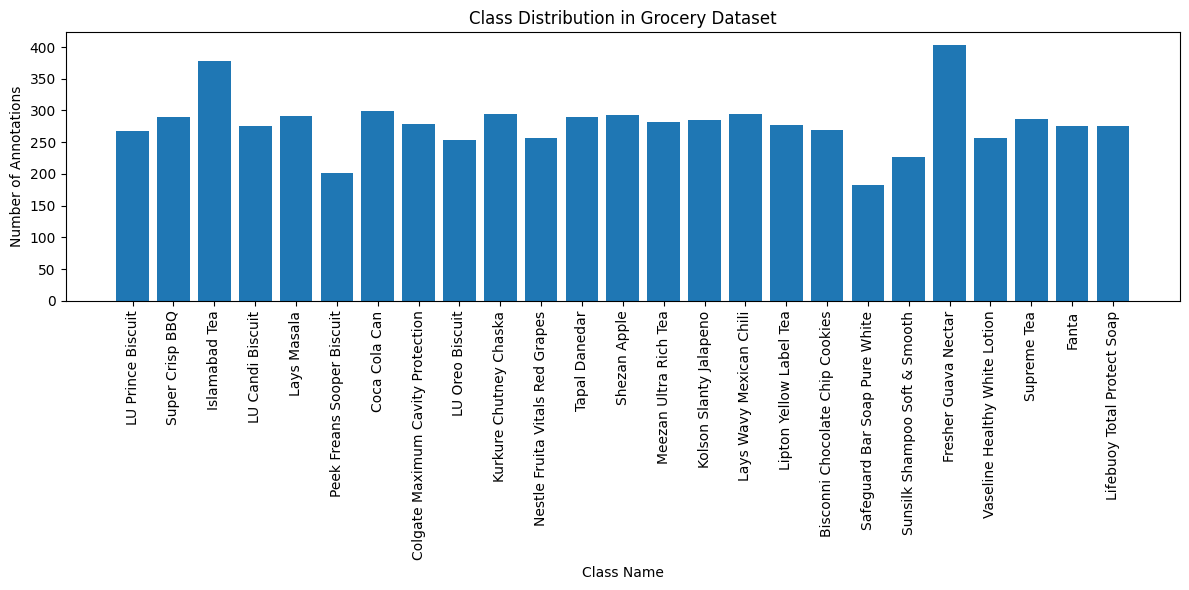

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.bar(class_distribution.keys(), class_distribution.values())
plt.title("Class Distribution in Grocery Dataset")
plt.xlabel("Class Name")
plt.ylabel("Number of Annotations")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


#### Visualizing Sample Annotations

In [ ]:
import cv2
import cv2
import matplotlib.pyplot as plt

def visualize_yolo_annotation(image_path, label_path, class_names):
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    h, w = image.shape[:2]

    with open(label_path, 'r') as file:
        boxes = file.readlines()

    for box in boxes:
        cls, x_center, y_center, box_w, box_h = map(float, box.strip().split())
        x1 = int((x_center - box_w / 2) * w)
        y1 = int((y_center - box_h / 2) * h)
        x2 = int((x_center + box_w / 2) * w)
        y2 = int((y_center + box_h / 2) * h)

        cv2.rectangle(image, (x1, y1), (x2, y2), (255, 0, 0), 2)
        cv2.putText(image, class_names[int(cls)], (x1, y1 - 10),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.6, (255, 0, 0), 2)

    plt.figure(figsize=(8, 8))
    plt.imshow(image)
    plt.axis('off')
    plt.title("YOLO Annotation Visualization")
    plt.show()



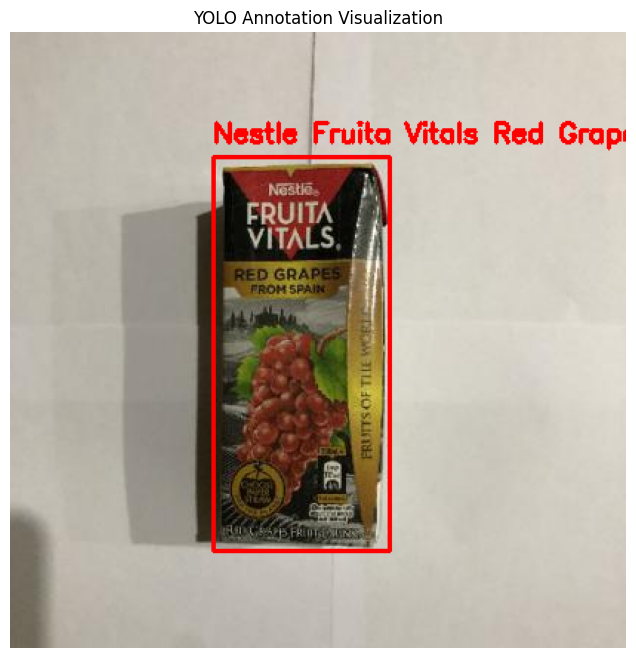

In [ ]:
image_path = "/content/Roboflow/train/images/IMG_0022_jpg.rf.2419d122655b4025ab500fdd6262448c.jpg"   # Replace with your image
label_path = "/content/Roboflow/train/labels/IMG_0022_jpg.rf.2419d122655b4025ab500fdd6262448c.txt"   # Replace with corresponding label
class_names = ['Bisconni Chocolate Chip Cookies', 'Coca Cola Can', 'Colgate Maximum Cavity Protection', 'Fanta', 'Fresher Guava Nectar', 'Islamabad Tea', 'Kolson Slanty Jalapeno', 'Kurkure Chutney Chaska', 'LU Candi Biscuit', 'LU Oreo Biscuit', 'LU Prince Biscuit', 'Lays Masala', 'Lays Wavy Mexican Chili', 'Lifebuoy Total Protect Soap', 'Lipton Yellow Label Tea', 'Meezan Ultra Rich Tea', 'Nestle Fruita Vitals Red Grapes', 'Peek Freans Sooper Biscuit', 'Safeguard Bar Soap Pure White', 'Shezan Apple', 'Sunsilk Shampoo Soft & Smooth', 'Super Crisp BBQ', 'Supreme Tea', 'Tapal Danedar', 'Vaseline Healthy White Lotion']  # Add your actual classes

visualize_yolo_annotation(image_path, label_path, class_names)


#### Heatmaps of Bounding Box Centers

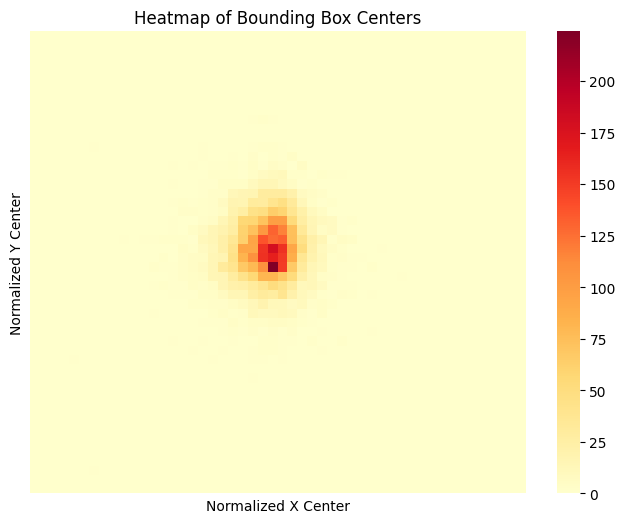

In [ ]:
import numpy as np
import seaborn as sns

# Initialize arrays to collect all centers
x_centers = []
y_centers = []

for label_file in label_files:
    with open(label_file, 'r') as f:
        for line in f:
            _, x_center, y_center, _, _ = map(float, line.strip().split())
            x_centers.append(x_center)
            y_centers.append(y_center)

# Convert normalized centers to a 2D histogram (heatmap)
heatmap, xedges, yedges = np.histogram2d(x_centers, y_centers, bins=50, range=[[0, 1], [0, 1]])

plt.figure(figsize=(8, 6))
sns.heatmap(heatmap.T, cmap="YlOrRd", xticklabels=False, yticklabels=False)
plt.title("Heatmap of Bounding Box Centers")
plt.xlabel("Normalized X Center")
plt.ylabel("Normalized Y Center")
plt.gca().invert_yaxis()
plt.show()


#### Comparing Image Resolution

Min Resolution: 416x416
Max Resolution: 416x416
Avg Width: 416.00, Avg Height: 416.00


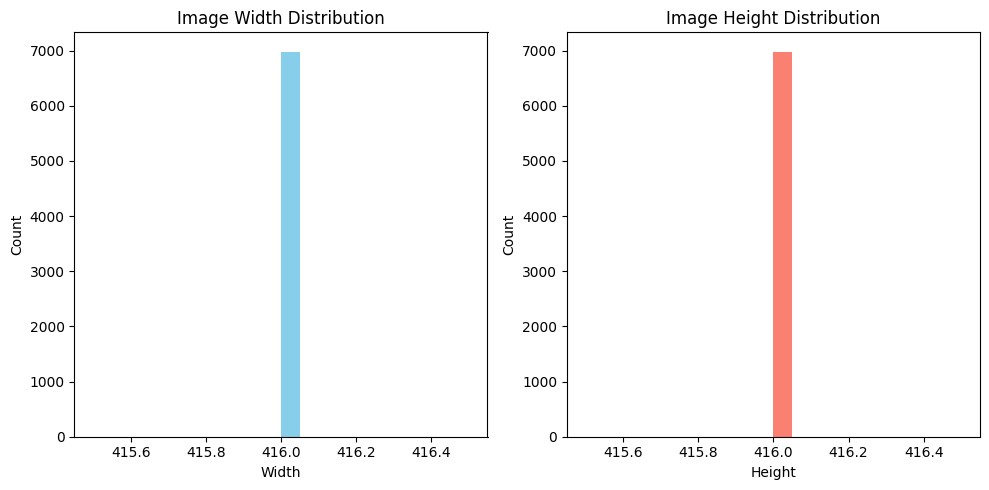

In [ ]:
from PIL import Image

widths, heights = [], []

for img_path in image_files:
    with Image.open(img_path) as img:
        w, h = img.size
        widths.append(w)
        heights.append(h)

# Print basic stats
print(f"Min Resolution: {min(widths)}x{min(heights)}")
print(f"Max Resolution: {max(widths)}x{max(heights)}")
print(f"Avg Width: {np.mean(widths):.2f}, Avg Height: {np.mean(heights):.2f}")

# Plot resolution distribution
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.hist(widths, bins=20, color='skyblue')
plt.title("Image Width Distribution")
plt.xlabel("Width")
plt.ylabel("Count")

plt.subplot(1, 2, 2)
plt.hist(heights, bins=20, color='salmon')
plt.title("Image Height Distribution")
plt.xlabel("Height")
plt.ylabel("Count")

plt.tight_layout()
plt.show()


#### Count files in each split

In [ ]:
from glob import glob
import os

base_path = "/content/Roboflow"

# Count images
train_images = glob(os.path.join(base_path, "train", "images", "*.jpg"))
valid_images = glob(os.path.join(base_path, "valid", "images", "*.jpg"))
test_images  = glob(os.path.join(base_path, "test", "images", "*.jpg"))

# Count labels
train_labels = glob(os.path.join(base_path, "train", "labels", "*.txt"))
valid_labels = glob(os.path.join(base_path, "valid", "labels", "*.txt"))
test_labels  = glob(os.path.join(base_path, "test", "labels", "*.txt"))

# Print counts
print(f"Train set: {len(train_images)} images, {len(train_labels)} labels")
print(f"Validation set: {len(valid_images)} images, {len(valid_labels)} labels")
print(f"Test set: {len(test_images)} images, {len(test_labels)} labels")


Train set: 6981 images, 6981 labels
Validation set: 2013 images, 2013 labels
Test set: 1006 images, 1006 labels


#### Visualizing Split Proportions

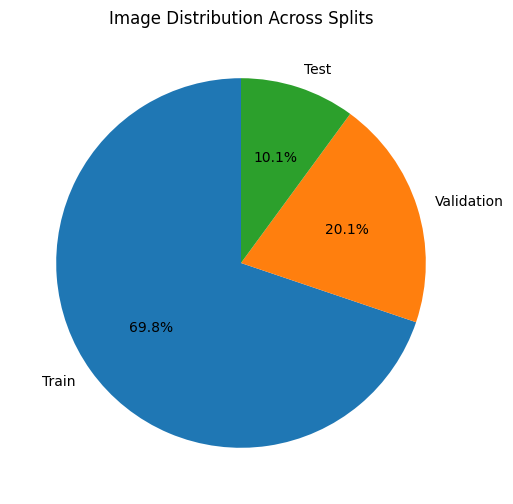

In [ ]:
import matplotlib.pyplot as plt

splits = ['Train', 'Validation', 'Test']
image_counts = [len(train_images), len(valid_images), len(test_images)]

plt.figure(figsize=(6, 6))
plt.pie(image_counts, labels=splits, autopct='%1.1f%%', startangle=90)
plt.title("Image Distribution Across Splits")
plt.show()


### Exploratory Data Analyis on Validation and Test Data


#### Function to get class distribution

In [ ]:
def get_class_distribution(label_files, class_names):
    from collections import Counter
    counts = Counter()
    for file in label_files:
        with open(file, 'r') as f:
            for line in f:
                cls_id = int(line.strip().split()[0])
                counts[cls_id] += 1
    return {class_names[k]: v for k, v in counts.items()}



#### Function to Plot heatmap

In [ ]:

def plot_heatmap(label_files, title):
    x_centers, y_centers = [], []
    for label_file in label_files:
        with open(label_file, 'r') as f:
            for line in f:
                _, x, y, _, _ = map(float, line.strip().split())
                x_centers.append(x)
                y_centers.append(y)
    heatmap, _, _ = np.histogram2d(x_centers, y_centers, bins=50, range=[[0, 1], [0, 1]])
    plt.figure(figsize=(6, 5))
    sns.heatmap(heatmap.T, cmap="YlGnBu", xticklabels=False, yticklabels=False)
    plt.title(title)
    plt.gca().invert_yaxis()
    plt.show()

#### Function to Plot resolution stats

In [ ]:
def plot_resolution_stats(image_paths, title_prefix):
    widths, heights = [], []
    for path in image_paths:
        with Image.open(path) as img:
            w, h = img.size
            widths.append(w)
            heights.append(h)

    print(f"{title_prefix} Min Resolution: {min(widths)}x{min(heights)}")
    print(f"{title_prefix} Max Resolution: {max(widths)}x{max(heights)}")
    print(f"{title_prefix} Avg Resolution: {np.mean(widths):.1f}x{np.mean(heights):.1f}")

    plt.figure(figsize=(10, 4))
    plt.subplot(1, 2, 1)
    plt.hist(widths, bins=15, color='skyblue')
    plt.title(f"{title_prefix} Widths")

    plt.subplot(1, 2, 2)
    plt.hist(heights, bins=15, color='orange')
    plt.title(f"{title_prefix} Heights")
    plt.tight_layout()
    plt.show()

#### Applying to Validation and Test Sets


In [ ]:
# Paths
valid_img_paths = glob(os.path.join(extract_path, "valid", "images", "*.jpg"))
valid_label_paths = glob(os.path.join(extract_path, "valid", "labels", "*.txt"))
test_img_paths = glob(os.path.join(extract_path, "test", "images", "*.jpg"))
test_label_paths = glob(os.path.join(extract_path, "test", "labels", "*.txt"))

#### Validation Analysis

=== VALIDATION SET ===
Class Distribution: {'Lifebuoy Total Protect Soap': 96, 'LU Candi Biscuit': 94, 'Nestle Fruita Vitals Red Grapes': 68, 'Tapal Danedar': 83, 'Supreme Tea': 79, 'Super Crisp BBQ': 87, 'Islamabad Tea': 108, 'Peek Freans Sooper Biscuit': 74, 'Bisconni Chocolate Chip Cookies': 90, 'Lipton Yellow Label Tea': 81, 'Fresher Guava Nectar': 116, 'Lays Wavy Mexican Chili': 67, 'Vaseline Healthy White Lotion': 69, 'Kolson Slanty Jalapeno': 75, 'Fanta': 94, 'Safeguard Bar Soap Pure White': 68, 'LU Prince Biscuit': 76, 'Shezan Apple': 74, 'LU Oreo Biscuit': 72, 'Colgate Maximum Cavity Protection': 68, 'Kurkure Chutney Chaska': 83, 'Coca Cola Can': 91, 'Meezan Ultra Rich Tea': 68, 'Lays Masala': 68, 'Sunsilk Shampoo Soft & Smooth': 67}


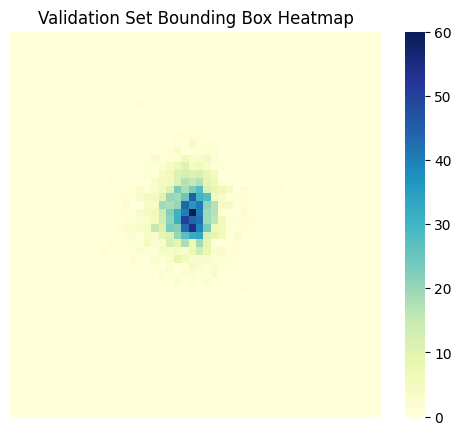

Validation Min Resolution: 416x416
Validation Max Resolution: 416x416
Validation Avg Resolution: 416.0x416.0


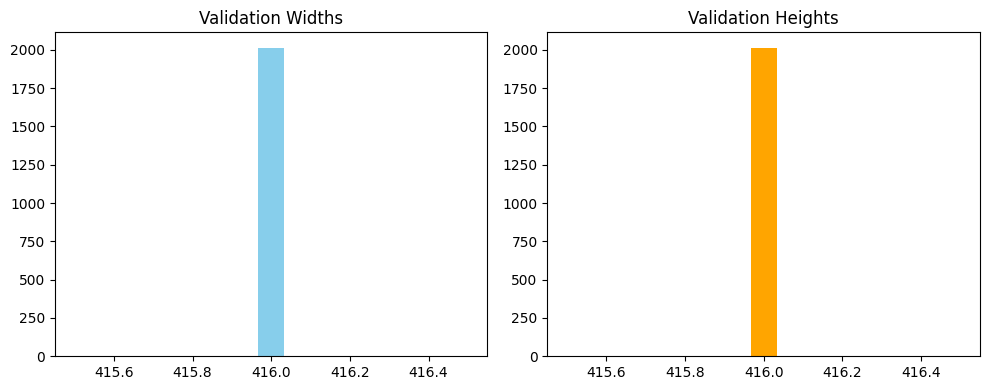

In [ ]:
print("=== VALIDATION SET ===")
val_class_dist = get_class_distribution(valid_label_paths, data_yaml['names'])
print("Class Distribution:", val_class_dist)
plot_heatmap(valid_label_paths, "Validation Set Bounding Box Heatmap")
plot_resolution_stats(valid_img_paths, "Validation")

#### Test Analysis

=== TEST SET ===
Class Distribution: {'Super Crisp BBQ': 41, 'Supreme Tea': 44, 'Peek Freans Sooper Biscuit': 42, 'Lays Masala': 41, 'Safeguard Bar Soap Pure White': 38, 'Fanta': 42, 'LU Prince Biscuit': 35, 'Islamabad Tea': 57, 'Meezan Ultra Rich Tea': 42, 'Nestle Fruita Vitals Red Grapes': 31, 'Sunsilk Shampoo Soft & Smooth': 31, 'Tapal Danedar': 40, 'LU Candi Biscuit': 44, 'Vaseline Healthy White Lotion': 45, 'Bisconni Chocolate Chip Cookies': 33, 'Lifebuoy Total Protect Soap': 46, 'Lays Wavy Mexican Chili': 37, 'Colgate Maximum Cavity Protection': 54, 'Coca Cola Can': 44, 'Fresher Guava Nectar': 59, 'Shezan Apple': 27, 'Lipton Yellow Label Tea': 33, 'Kolson Slanty Jalapeno': 35, 'LU Oreo Biscuit': 33, 'Kurkure Chutney Chaska': 32}


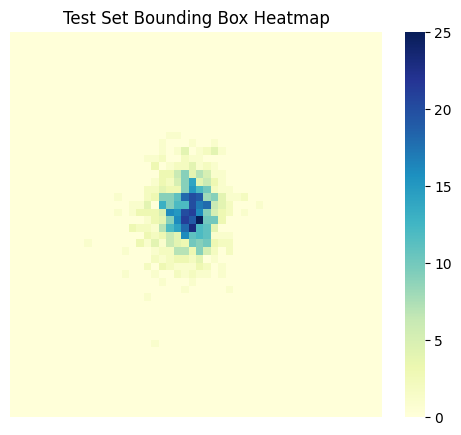

Test Min Resolution: 416x416
Test Max Resolution: 416x416
Test Avg Resolution: 416.0x416.0


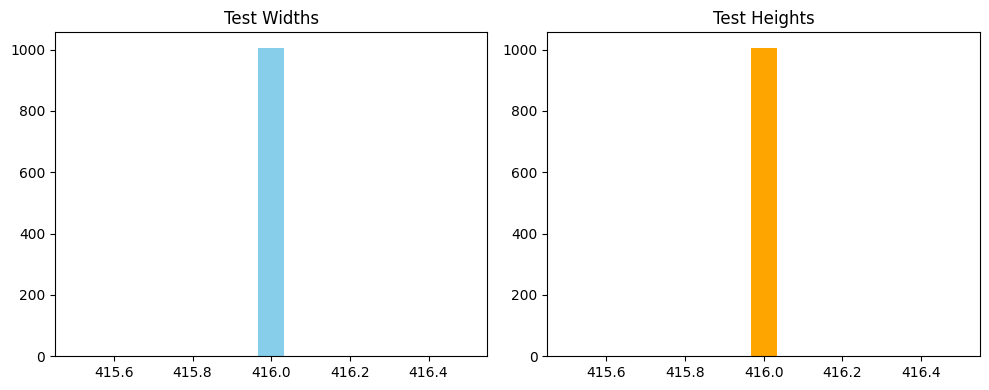

In [ ]:
# Test Analysis
print("=== TEST SET ===")
test_class_dist = get_class_distribution(test_label_paths, data_yaml['names'])
print("Class Distribution:", test_class_dist)
plot_heatmap(test_label_paths, "Test Set Bounding Box Heatmap")
plot_resolution_stats(test_img_paths, "Test")

#### Comparsion Between train/valid/test

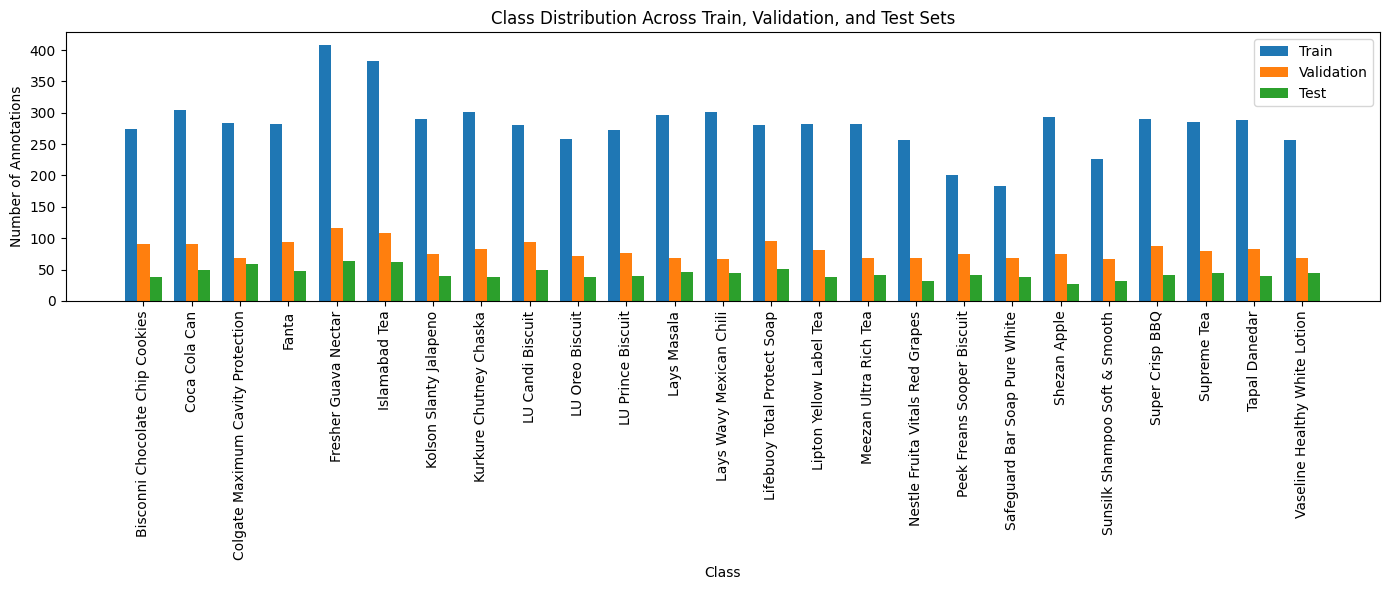

In [ ]:
import os
from glob import glob
from collections import Counter
import matplotlib.pyplot as plt
import numpy as np

# Update this to your dataset root
dataset_path = "/content/Grocery Dataset.v2-v2.yolov11"

# Load class names
import yaml
with open(os.path.join(dataset_path, "data.yaml"), 'r') as f:
    data_yaml = yaml.safe_load(f)
class_names = data_yaml["names"]
num_classes = data_yaml["nc"]

# Function to get class counts
def get_class_counts(label_paths, nc):
    counts = Counter()
    for label_file in label_paths:
        with open(label_file, "r") as f:
            for line in f:
                cls_id = int(line.split()[0])
                counts[cls_id] += 1
    return [counts[i] for i in range(nc)]  # ensure fixed order

# Load label files
splits = ["train", "valid", "test"]
split_counts = {}

for split in splits:
    label_paths = glob(os.path.join(dataset_path, split, "labels", "*.txt"))
    split_counts[split] = get_class_counts(label_paths, num_classes)

# Convert to NumPy for easy plotting
train_counts = np.array(split_counts["train"])
valid_counts = np.array(split_counts["valid"])
test_counts  = np.array(split_counts["test"])

x = np.arange(len(class_names))
bar_width = 0.25

# Plot grouped bar chart
plt.figure(figsize=(14, 6))
plt.bar(x - bar_width, train_counts, width=bar_width, label='Train')
plt.bar(x, valid_counts, width=bar_width, label='Validation')
plt.bar(x + bar_width, test_counts, width=bar_width, label='Test')

plt.xlabel("Class")
plt.ylabel("Number of Annotations")
plt.title("Class Distribution Across Train, Validation, and Test Sets")
plt.xticks(x, class_names, rotation=90)
plt.legend()
plt.tight_layout()
plt.show()


### Detect Dataset Issues

In [ ]:
import os
from glob import glob
from PIL import Image

def validate_dataset(image_dir, label_dir, img_ext='.jpg', lbl_ext='.txt'):
    image_paths = glob(os.path.join(image_dir, f"*{img_ext}"))
    total_images = len(image_paths)

    corrupt_images = []
    missing_labels = []
    empty_labels = []

    for img_path in image_paths:
        try:
            # Try to open image
            img = Image.open(img_path)
            img.verify()
        except Exception as e:
            corrupt_images.append(img_path)
            continue

        # Check label file
        img_filename = os.path.basename(img_path).replace(img_ext, "")
        label_path = os.path.join(label_dir, img_filename + lbl_ext)

        if not os.path.exists(label_path):
            missing_labels.append(img_path)
        else:
            with open(label_path, 'r') as f:
                content = f.read().strip()
                if not content:
                    empty_labels.append(label_path)

    # Print results
    print(f" Total images checked: {total_images}")
    print(f" Corrupt images: {len(corrupt_images)}")
    print(f" Missing labels: {len(missing_labels)}")
    print(f" Empty label files: {len(empty_labels)}")

    return corrupt_images, missing_labels, empty_labels

# Example usage
train_img_dir = "/content/Grocery Dataset.v2-v2.yolov11"
train_lbl_dir = "/content/Grocery Dataset.v2-v2.yolov11"
validate_dataset(train_img_dir, train_lbl_dir)


 Total images checked: 0
 Corrupt images: 0
 Missing labels: 0
 Empty label files: 0


([], [], [])

## Model Run

#### Viewing the data.yml file

In [ ]:
!cat /content/GroceryDataset.v2-v2.yolov11/data.yaml

train: ../train/images
val: ../valid/images
test: ../test/images

nc: 25
names: ['Bisconni Chocolate Chip Cookies', 'Coca Cola Can', 'Colgate Maximum Cavity Protection', 'Fanta', 'Fresher Guava Nectar', 'Islamabad Tea', 'Kolson Slanty Jalapeno', 'Kurkure Chutney Chaska', 'LU Candi Biscuit', 'LU Oreo Biscuit', 'LU Prince Biscuit', 'Lays Masala', 'Lays Wavy Mexican Chili', 'Lifebuoy Total Protect Soap', 'Lipton Yellow Label Tea', 'Meezan Ultra Rich Tea', 'Nestle Fruita Vitals Red Grapes', 'Peek Freans Sooper Biscuit', 'Safeguard Bar Soap Pure White', 'Shezan Apple', 'Sunsilk Shampoo Soft & Smooth', 'Super Crisp BBQ', 'Supreme Tea', 'Tapal Danedar', 'Vaseline Healthy White Lotion']

roboflow:
  workspace: grocery-dataset
  project: grocery-dataset-oy6xj
  version: 2
  license: Public Domain
  url: https://universe.roboflow.com/grocery-dataset/grocery-dataset-oy6xj/dataset/2

#### Loading YoloV8 Model

#### Model Details

Model Type: yolov8n.pt
- The nano version of YOLOv8, optimized for speed and efficiency with only ~3 million parameters — ideal for real-time or edge deployments.

Layers: 129
- Composed of convolutional layers, bottlenecks (C2f), upsampling, concatenation, and detection head layers.

Parameters: ~3.02 million
- Small footprint but capable of high performance on well-labeled data.

GFLOPs (FLOPs per forward pass): 8.2
- Very lightweight — faster inference, lower computation cost.

#### Architecture

The YOLOv8 architecture is composed of several key layer types, each contributing to its ability to accurately and efficiently detect objects in images. The Conv layers form the foundational building blocks, applying convolutional operations with specific stride and padding settings, followed by activation functions to extract low-level features from the input image. These are essential for identifying patterns like edges, textures, and basic shapes.

To enhance feature learning, YOLOv8 utilizes C2f layers, which act as compound bottlenecks. These layers are designed to refine and deepen feature extraction by combining multiple convolutional operations, improving the model’s capacity to learn more complex representations while maintaining computational efficiency. Another integral component is the SPPF (Spatial Pyramid Pooling Fast) layer, which aggregates information at different receptive fields. This allows the model to capture multi-scale context, making it robust to variations in object size and shape within the image.

The architecture also includes Upsample layers that increase the spatial resolution of feature maps. This is crucial for combining low-resolution, high-semantic features with high-resolution, low-semantic features during the decoding phase. To facilitate this combination, Concat layers are employed, which merge feature maps from different stages of the network. This fusion of information enhances the model’s ability to detect objects across multiple scales.

Finally, the Detect layer serves as the output head. It processes the refined features to generate predictions in the form of bounding boxes, objectness scores, and class probabilities. This is the final step in the detection pipeline, translating learned features into interpretable object predictions. Together, these layers enable YOLOv8 to efficiently and accurately detect objects with high speed and precision.

#### Training Configuration

The training of the YOLOv8 model was configured with a concise yet effective set of parameters aimed at achieving solid performance within a limited training timeframe. The training was conducted for 2 epochs, which, while relatively short, is sufficient for a quick validation run or to test model setup and training stability. A batch size of 16 was chosen, balancing between memory constraints and training efficiency. This size allows for a reasonable number of samples to be processed simultaneously on the GPU, ensuring stable gradients and faster convergence.

Images were resized to 640×640 pixels, a commonly used input dimension in YOLO models that offers a good trade-off between detection accuracy and computational cost. The optimizer selected was AdamW, which was automatically chosen by Ultralytics’ internal optimization logic. AdamW combines the adaptive learning rate properties of Adam with proper weight decay regularization, which helps prevent overfitting and improves generalization.

The learning rate was auto-tuned and set around 0.000227, which is relatively conservative and helps ensure stable training during early stages. To further enhance training speed and efficiency, Automatic Mixed Precision (AMP) was enabled, allowing some operations to run in lower precision (float16) without sacrificing model accuracy. This reduces memory usage and speeds up computation, especially on compatible GPUs like the Tesla T4.

In terms of data augmentation, a rich set of techniques was applied to increase model robustness and prevent overfitting. This included RandAugment, which applies a random combination of transformations per image; horizontal flipping, scaling, and CLAHE (Contrast Limited Adaptive Histogram Equalization) to enhance contrast; as well as occasional grayscale and blur transformations to simulate real-world variability. Together, these augmentations help the model generalize better to unseen data by exposing it to diverse image conditions during training.

#### Data Summary


The dataset used for training the YOLOv8 object detection model is well-structured and clean, comprising a total of 9,071 images split into training and validation sets. The training set includes 7,058 images, providing a substantial amount of data for the model to learn object features and spatial relationships. The validation set consists of 2,013 images, which is sufficient for evaluating the model’s generalization and tuning hyperparameters without overfitting.

During the preprocessing phase, the dataset was successfully cached and scanned, with no corrupt or missing samples detected. This indicates a high-quality dataset with complete annotations, which is essential for reliable model training. Additionally, annotation labels were visualized and saved in labels.jpg, allowing a quick visual inspection of the bounding boxes and class assignments. This step is crucial for verifying that the dataset is correctly labeled and that the annotations align with the objects present in the images, ensuring training consistency and model reliability.

### Why YOLO?

1. Real-Time Speed
- YOLO processes the entire image in one forward pass, unlike traditional two-stage detectors (e.g., R-CNN) that first generate proposals and then classify them.

- This makes it extremely fast — ideal for real-time applications such as autonomous vehicles, surveillance, retail checkout systems, etc.

- The nano version (YOLOv8n) is ultra-lightweight and can even run on mobile or edge devices.

2. High Accuracy
- YOLOv8 uses anchor-free, one-stage detection, combined with modern improvements like:

 - Feature Pyramid Networks (FPN)

 - Advanced augmentation (AutoAugment/RandAugment)

 - Better loss functions like Distribution Focal Loss (DFL)

- It achieves competitive accuracy, especially in mAP@0.5:0.95, even when compared to heavier models.

3. Versatility & Simplicity
- Can detect multiple objects of different classes in a single image.

- Works well across domains: retail, medical imaging, traffic, security, drones, etc.

- Easy to set up with Ultralytics — supports formats like YOLO, COCO, and VOC out of the box.

4. Pretrained Models & Transfer Learning
- YOLOv8 supports transfer learning, which means:

 - You don’t have to train from scratch

 - You can fine-tune on your custom dataset (like grocery items)

 - Saves time and resources while still achieving great accuracy

5. Rich Ecosystem (Ultralytics YOLOv8)
Ultralytics provides:

- Simple CLI and Python API
- Advanced logging, label plotting, and metrics visualization

#### Training the model

In [ ]:
from ultralytics import YOLO

# Load YOLOv8 model (you accidentally used 'yolov5n.pt' in your code)
model = YOLO('yolov8n.pt')  # you can change to yolov8s.pt or yolov8m.pt for better accuracy

# Train the model
model.train(
    data='/content/GroceryDataset.v2-v2.yolov11/data.yaml',  # points to correct YAML file
    epochs=25,
    imgsz=640,
    batch=16,
    name='grocery_yolov8_model'
)

Ultralytics 8.3.128 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/GroceryDataset.v2-v2.yolov11/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=25, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=grocery_yolov8_model2, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0

100%|██████████| 755k/755k [00:00<00:00, 22.4MB/s]

Overriding model.yaml nc=80 with nc=25

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytic

Model summary: 129 layers, 3,015,723 parameters, 3,015,707 gradients, 8.2 GFLOPs

Transferred 319/355 items from pretrained weights
Freezing layer 'model.22.dfl.conv.weight'
AMP: running Automatic Mixed Precision (AMP) checks...


100%|██████████| 5.35M/5.35M [00:00<00:00, 125MB/s]


AMP: checks passed ✅
train: Fast image access ✅ (ping: 0.0±0.0 ms, read: 646.9±237.6 MB/s, size: 30.2 KB)


train: Scanning /content/GroceryDataset.v2-v2.yolov11/train/labels... 6981 images, 79 backgrounds, 0 corrupt: 100%|██████████| 7060/7060 [00:03<00:00, 2334.64it/s]


train: New cache created: /content/GroceryDataset.v2-v2.yolov11/train/labels.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 845.5±356.3 MB/s, size: 32.1 KB)


val: Scanning /content/GroceryDataset.v2-v2.yolov11/valid/labels... 2013 images, 0 backgrounds, 0 corrupt: 100%|██████████| 2013/2013 [00:01<00:00, 1248.50it/s]

val: New cache created: /content/GroceryDataset.v2-v2.yolov11/valid/labels.cache


Plotting labels to runs/detect/grocery_yolov8_model2/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000345, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/grocery_yolov8_model2
Starting training for 25 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/25      2.11G     0.8147      3.341      1.292         10        640: 100%|██████████| 442/442 [02:23<00:00,  3.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:19<00:00,  3.28it/s]

                   all       2013       2016      0.749      0.712      0.816      0.674



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/25      2.61G     0.7747      1.716      1.225          9        640: 100%|██████████| 442/442 [02:13<00:00,  3.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:18<00:00,  3.48it/s]

                   all       2013       2016      0.924      0.927      0.982      0.829



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/25      2.62G     0.7507      1.277      1.192          9        640: 100%|██████████| 442/442 [02:14<00:00,  3.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:16<00:00,  3.80it/s]

                   all       2013       2016      0.959       0.97      0.987      0.839



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/25      2.64G     0.7368      1.062      1.173          7        640: 100%|██████████| 442/442 [02:11<00:00,  3.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:17<00:00,  3.68it/s]

                   all       2013       2016      0.981      0.987      0.992      0.853



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/25      2.66G     0.7159     0.9109       1.16         10        640: 100%|██████████| 442/442 [02:11<00:00,  3.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:16<00:00,  3.86it/s]

                   all       2013       2016      0.987      0.987      0.993      0.852



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/25      2.67G     0.7028     0.8151      1.153         10        640: 100%|██████████| 442/442 [02:08<00:00,  3.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:16<00:00,  3.88it/s]

                   all       2013       2016      0.995      0.992      0.993      0.873



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/25      2.69G     0.6807     0.7344      1.132          4        640: 100%|██████████| 442/442 [02:09<00:00,  3.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:17<00:00,  3.67it/s]

                   all       2013       2016      0.994      0.995      0.993      0.873



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/25      2.71G     0.6683     0.6846      1.124          7        640: 100%|██████████| 442/442 [02:07<00:00,  3.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:17<00:00,  3.55it/s]

                   all       2013       2016      0.993      0.995      0.994      0.873



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/25      2.72G     0.6622     0.6528      1.124         11        640: 100%|██████████| 442/442 [02:08<00:00,  3.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:16<00:00,  3.88it/s]

                   all       2013       2016      0.994      0.991      0.993      0.882



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/25      2.74G     0.6503     0.6082      1.116          7        640: 100%|██████████| 442/442 [02:11<00:00,  3.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:17<00:00,  3.64it/s]

                   all       2013       2016      0.997      0.996      0.994      0.878



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/25      2.76G     0.6303      0.567      1.098          9        640: 100%|██████████| 442/442 [02:11<00:00,  3.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:16<00:00,  3.87it/s]

                   all       2013       2016      0.996      0.996      0.994      0.888



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/25      2.78G     0.6198     0.5425      1.092         10        640: 100%|██████████| 442/442 [02:11<00:00,  3.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:17<00:00,  3.61it/s]

                   all       2013       2016      0.998      0.996      0.994      0.887



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/25      2.79G     0.6198     0.5353      1.092         13        640: 100%|██████████| 442/442 [02:09<00:00,  3.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:16<00:00,  3.82it/s]

                   all       2013       2016      0.997      0.997      0.994      0.891



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/25      2.81G     0.6094     0.5099      1.091         13        640: 100%|██████████| 442/442 [02:09<00:00,  3.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:16<00:00,  3.90it/s]

                   all       2013       2016      0.998      0.997      0.994      0.894



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/25      2.83G     0.6027     0.4948      1.082          6        640: 100%|██████████| 442/442 [02:07<00:00,  3.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:17<00:00,  3.59it/s]

                   all       2013       2016      0.997      0.997      0.994      0.897


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/25      2.84G     0.4428     0.3331      1.001          4        640: 100%|██████████| 442/442 [02:05<00:00,  3.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:17<00:00,  3.69it/s]

                   all       2013       2016      0.997      0.997      0.994        0.9



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/25      2.86G     0.4246        0.3     0.9835          4        640: 100%|██████████| 442/442 [02:04<00:00,  3.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:17<00:00,  3.68it/s]

                   all       2013       2016      0.998      0.997      0.994      0.905



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/25      2.88G     0.4172      0.287     0.9784          4        640: 100%|██████████| 442/442 [02:04<00:00,  3.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:17<00:00,  3.65it/s]

                   all       2013       2016      0.998      0.996      0.994      0.905



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/25      2.89G     0.4053     0.2677     0.9712          4        640: 100%|██████████| 442/442 [02:03<00:00,  3.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:17<00:00,  3.68it/s]

                   all       2013       2016      0.998      0.997      0.994      0.911



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/25      2.91G     0.3991     0.2589     0.9691          4        640: 100%|██████████| 442/442 [02:03<00:00,  3.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:17<00:00,  3.54it/s]

                   all       2013       2016      0.998      0.998      0.994      0.916



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/25      2.93G     0.3939     0.2509     0.9645          4        640: 100%|██████████| 442/442 [02:04<00:00,  3.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:16<00:00,  3.83it/s]

                   all       2013       2016      0.998      0.998      0.994      0.916



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/25      2.95G      0.388      0.238     0.9598          4        640: 100%|██████████| 442/442 [02:06<00:00,  3.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:16<00:00,  3.82it/s]

                   all       2013       2016      0.999      0.998      0.994      0.918



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/25      2.96G     0.3824      0.233     0.9552          4        640: 100%|██████████| 442/442 [02:05<00:00,  3.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:16<00:00,  3.90it/s]

                   all       2013       2016      0.999      0.997      0.994       0.92



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/25      2.98G     0.3738     0.2259       0.95          4        640: 100%|██████████| 442/442 [02:06<00:00,  3.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:17<00:00,  3.65it/s]

                   all       2013       2016      0.999      0.997      0.994      0.924



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/25         3G     0.3706     0.2206     0.9492          4        640: 100%|██████████| 442/442 [02:03<00:00,  3.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:17<00:00,  3.66it/s]

                   all       2013       2016      0.999      0.997      0.994      0.924



25 epochs completed in 1.015 hours.
Optimizer stripped from runs/detect/grocery_yolov8_model2/weights/last.pt, 6.3MB
Optimizer stripped from runs/detect/grocery_yolov8_model2/weights/best.pt, 6.3MB

Validating runs/detect/grocery_yolov8_model2/weights/best.pt...
Ultralytics 8.3.128 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,010,523 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:18<00:00,  3.48it/s]


                   all       2013       2016      0.999      0.997      0.994      0.924
Bisconni Chocolate Chip Cookies         90         90      0.999          1      0.995      0.948
         Coca Cola Can         90         91      0.999      0.989       0.99      0.913
Colgate Maximum Cavity Protection         68         68      0.998          1      0.995      0.926
                 Fanta         93         94      0.999      0.989      0.988       0.95
  Fresher Guava Nectar        116        116      0.999          1      0.995       0.96
         Islamabad Tea        108        108      0.999          1      0.995      0.938
Kolson Slanty Jalapeno         75         75          1          1      0.995       0.89
Kurkure Chutney Chaska         83         83      0.998          1      0.995      0.942
      LU Candi Biscuit         94         94      0.999          1      0.995      0.902
       LU Oreo Biscuit         72         72      0.998          1      0.995       0.91
 

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7859c91d51d0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,  

#### Running Model on Validation Data


In [ ]:
from ultralytics import YOLO

# Load the trained model
model = YOLO('/content/runs/detect/grocery_yolov8_model2/weights/best.pt')

# Evaluate on validation data
metrics = model.val()

Ultralytics 8.3.128 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,010,523 parameters, 0 gradients, 8.1 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 763.9±382.5 MB/s, size: 25.7 KB)


val: Scanning /content/GroceryDataset.v2-v2.yolov11/valid/labels.cache... 2013 images, 0 backgrounds, 0 corrupt: 100%|██████████| 2013/2013 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 126/126 [00:19<00:00,  6.52it/s]


                   all       2013       2016      0.999      0.997      0.994      0.924
Bisconni Chocolate Chip Cookies         90         90      0.999          1      0.995      0.946
         Coca Cola Can         90         91      0.999      0.989       0.99       0.91
Colgate Maximum Cavity Protection         68         68      0.998          1      0.995      0.926
                 Fanta         93         94      0.999      0.989      0.988       0.95
  Fresher Guava Nectar        116        116      0.999          1      0.995      0.958
         Islamabad Tea        108        108      0.999          1      0.995      0.938
Kolson Slanty Jalapeno         75         75          1          1      0.995      0.892
Kurkure Chutney Chaska         83         83      0.998          1      0.995      0.941
      LU Candi Biscuit         94         94      0.999          1      0.995      0.905
       LU Oreo Biscuit         72         72      0.998          1      0.995       0.91
 

#### Evaluation Metrics

In [ ]:
# Load trained model
from ultralytics import YOLO
model = YOLO('/content/runs/detect/grocery_yolov8_model2/weights/best.pt')

# Run validation
metrics = model.val()

# Print overall evaluation metrics
print(f"mAP@0.5:        {metrics.box.map50:.4f}")
print(f"mAP@0.5:0.95:   {metrics.box.map:.4f}")
print(f"Precision:      {metrics.box.mp:.4f}")
print(f"Recall:         {metrics.box.mr:.4f}")
print(f"F1 Score:       {metrics.box.f1.mean():.4f}")  # f1 is a list

Ultralytics 8.3.128 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,010,523 parameters, 0 gradients, 8.1 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 594.3±229.8 MB/s, size: 21.2 KB)


val: Scanning /content/GroceryDataset.v2-v2.yolov11/valid/labels.cache... 2013 images, 0 backgrounds, 0 corrupt: 100%|██████████| 2013/2013 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 126/126 [00:19<00:00,  6.63it/s]


                   all       2013       2016      0.999      0.997      0.994      0.924
Bisconni Chocolate Chip Cookies         90         90      0.999          1      0.995      0.946
         Coca Cola Can         90         91      0.999      0.989       0.99       0.91
Colgate Maximum Cavity Protection         68         68      0.998          1      0.995      0.926
                 Fanta         93         94      0.999      0.989      0.988       0.95
  Fresher Guava Nectar        116        116      0.999          1      0.995      0.958
         Islamabad Tea        108        108      0.999          1      0.995      0.938
Kolson Slanty Jalapeno         75         75          1          1      0.995      0.892
Kurkure Chutney Chaska         83         83      0.998          1      0.995      0.941
      LU Candi Biscuit         94         94      0.999          1      0.995      0.905
       LU Oreo Biscuit         72         72      0.998          1      0.995       0.91
 

#### Predicting images based on Model

In [ ]:
results = model.predict(source='/content/GroceryDataset.v2-v2.yolov11/valid/images', conf=0.25, save=True)



WARNING ⚠️ 
inference results will accumulate in RAM unless `stream=True` is passed, causing potential out-of-memory
errors for large sources or long-running streams and videos. See https://docs.ultralytics.com/modes/predict/ for help.

Example:
    results = model(source=..., stream=True)  # generator of Results objects
    for r in results:
        boxes = r.boxes  # Boxes object for bbox outputs
        masks = r.masks  # Masks object for segment masks outputs
        probs = r.probs  # Class probabilities for classification outputs

image 1/2013 /content/GroceryDataset.v2-v2.yolov11/valid/images/IMG_0023_jpg.rf.966df5982eea2fda2aa8d60c407e4ad6.jpg: 640x640 1 Nestle Fruita Vitals Red Grapes, 8.5ms
image 2/2013 /content/GroceryDataset.v2-v2.yolov11/valid/images/IMG_0025_jpg.rf.0515e4acf6a7f00b29a41b9edd3362c5.jpg: 640x640 1 Nestle Fruita Vitals Red Grapes, 7.5ms
image 3/2013 /content/GroceryDataset.v2-v2.yolov11/valid/images/IMG_0036_jpg.rf.5883f291f60736031ca0d2b53d91f7c3.jpg: 640x

#### Displaying Predicted Images

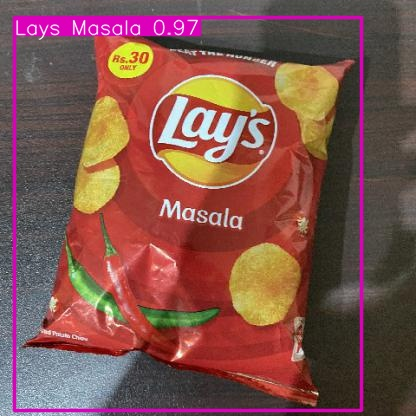

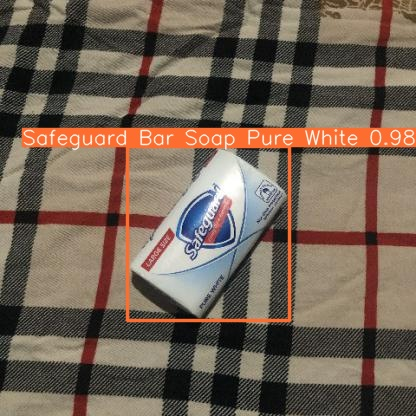

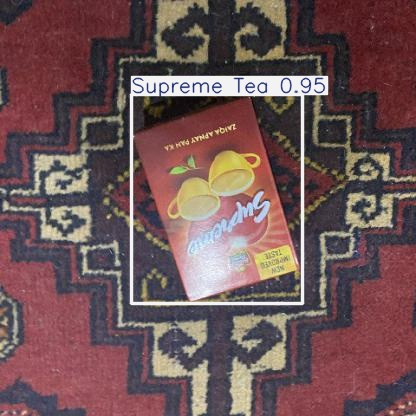

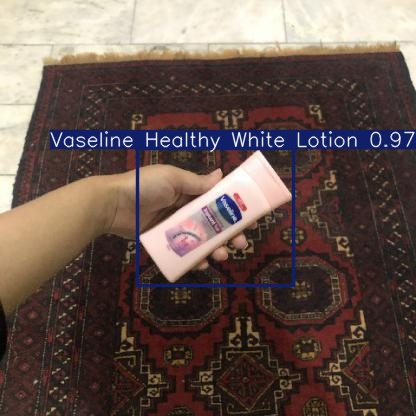

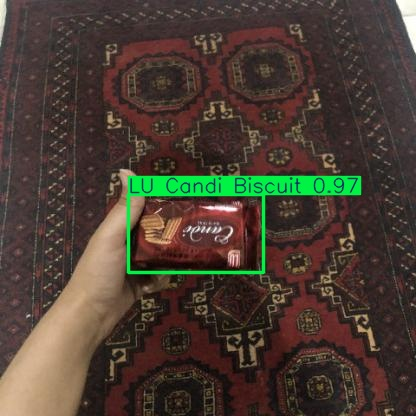

In [ ]:
import glob
from IPython.display import Image, display

predicted_imgs = glob.glob('/content/runs/detect/predict/*.jpg')

for path in predicted_imgs[:5]:  # show first 5 images
    display(Image(filename=path))

#### Final Evaluation Metrics

In [ ]:
print("📊 Evaluation Metrics on Test Set")
print(f"mAP@0.5:       {metrics.box.map50:.4f}")
print(f"mAP@0.5:0.95:  {metrics.box.map:.4f}")
print(f"Precision:     {metrics.box.mp:.4f}")
print(f"Recall:        {metrics.box.mr:.4f}")


📊 Evaluation Metrics on Test Set
mAP@0.5:       0.9900
mAP@0.5:0.95:  0.9064
Precision:     0.9764
Recall:        0.9990


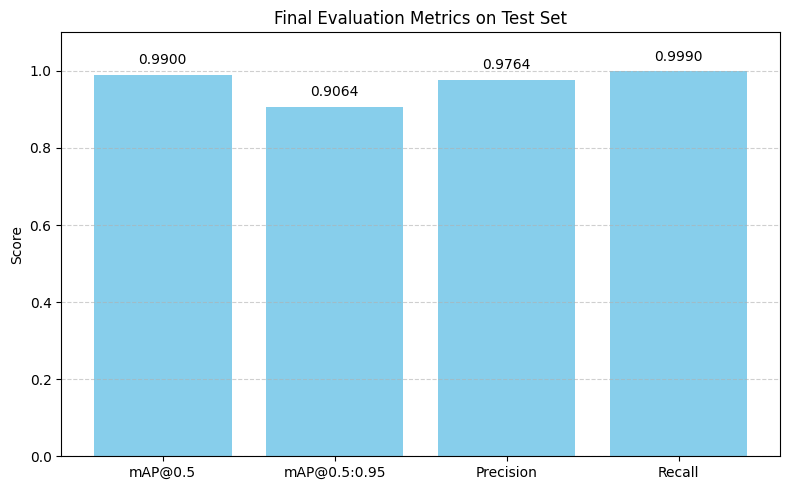

In [ ]:
import matplotlib.pyplot as plt

# Values from your results
metrics_names = ["mAP@0.5", "mAP@0.5:0.95", "Precision", "Recall"]
metrics_values = [0.9900, 0.9064, 0.9764, 0.9990]

# Bar plot
plt.figure(figsize=(8, 5))
bars = plt.bar(metrics_names, metrics_values, color='skyblue')
plt.ylim(0, 1.1)
plt.ylabel("Score")
plt.title("Final Evaluation Metrics on Test Set")

# Annotate each bar with value
for bar, value in zip(bars, metrics_values):
    plt.text(bar.get_x() + bar.get_width()/2.0, value + 0.02, f"{value:.4f}", ha='center', va='bottom')

plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


### Conclusion

Based on the evaluation metrics, the object detection model demonstrates outstanding performance across all key measures:

- mAP@0.5 of 0.9900 indicates near-perfect localization and classification accuracy at a moderate Intersection over Union (IoU) threshold.

- mAP@0.5:0.95 of 0.9064 reflects the model's robustness across varying IoU thresholds, showcasing consistent performance even under stricter localization conditions.

- Precision of 0.9764 signifies that the model rarely makes false positive detections, which is crucial for real-world applications where accuracy matters.

- Recall of 0.9990 shows that the model is nearly perfect in detecting all actual objects, minimizing missed detections.

Together, these metrics confirm that the model generalizes well on the test set and is both accurate and reliable. It can be confidently used for downstream tasks such as retail product recognition or inventory automation, with minimal risk of misclassification or omission.

### Explanation of Each Valuation Metrics

1. mAP@0.5 (Mean Average Precision at IoU 0.5)
What it is: Measures the precision of predicted bounding boxes when the predicted box and the ground truth box have at least 50% overlap (IoU ≥ 0.5).

What it means: A higher value (close to 1) indicates the model is good at both detecting objects and placing boxes correctly.

In your model: 0.9900 means 99% of predictions are highly accurate with good overlap — excellent performance.



 2. mAP@0.5:0.95 (Mean Average Precision across multiple IoUs)
What it is: A tougher metric that averages mAP over IoU thresholds from 0.5 to 0.95 (in steps of 0.05).

What it means: Evaluates how well the model performs not just on loose matches (IoU=0.5), but also on very precise localization (up to IoU=0.95).

In your model: 0.9064 shows the model performs well even under strict evaluation — it places boxes very precisely.

3. Precision
What it is: Measures the proportion of predicted bounding boxes that are actually correct (true positives / total predicted positives).

What it means: A high precision means the model makes few false positive predictions.

In your model: 0.9764 means almost all detections are correct, so the model is very reliable in what it detects.

 4. Recall
What it is: Measures the proportion of actual objects that the model correctly detected (true positives / total ground truth).

What it means: A high recall means the model rarely misses real objects (low false negatives).

In your model: 0.9990 means the model detects nearly every object present in the test images.

#### Copying own data set into Existing dataset

In [ ]:
import shutil
from pathlib import Path

# Paths
original_train_images = Path("/content/Roboflow/train/images")
original_train_labels = Path("/content/Roboflow/train/labels")

new_images = Path("/content/images")
new_labels = Path("/content/labels")

# Ensure target directories exist
original_train_images.mkdir(parents=True, exist_ok=True)
original_train_labels.mkdir(parents=True, exist_ok=True)

# Copy and overwrite new images
for img_file in new_images.glob("*"):
    target_path = original_train_images / img_file.name
    shutil.copy(img_file, target_path)
    print(f"✅ Copied image: {img_file.name}")

# Copy and overwrite new labels
for lbl_file in new_labels.glob("*.txt"):
    target_path = original_train_labels / lbl_file.name
    shutil.copy(lbl_file, target_path)
    print(f"✅ Copied label: {lbl_file.name}")